In [32]:
!pip install torchvision

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import pandas as pd
import torchvision
from torchvision import transforms, datasets

In [34]:
data_path = 'ASL/asl_alphabet_train/asl_alphabet_train'

transform1 = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(size=(128,128)),
    transforms.Grayscale(num_output_channels=1),
    transforms.Lambda(lambda x: x.squeeze())
])

In [35]:
dataset = datasets.ImageFolder(data_path, transform=transform1)
num_samples = len(dataset)
dataset

Dataset ImageFolder
    Number of datapoints: 87000
    Root location: ASL/asl_alphabet_train/asl_alphabet_train
    StandardTransform
Transform: Compose(
               ToTensor()
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
               Grayscale(num_output_channels=1)
               Lambda()
           )

In [36]:
indices = torch.randperm(num_samples)

split = int(num_samples * 0.2)

train_dataset = torch.utils.data.Subset(dataset, indices[split:])
test_dataset = torch.utils.data.Subset(dataset, indices[:split])

len(train_dataset), len(test_dataset)

(69600, 17400)

In [37]:
train_dataloader = torch.utils.data.DataLoader(dataset=train_dataset,
    batch_size=32, 
    shuffle=True, 
    num_workers=4)

test_dataloader = torch.utils.data.DataLoader(dataset=test_dataset,
    batch_size=32,
    shuffle=False,
    num_workers=4)

In [38]:
classes = dataset.classes
classes

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'del',
 'nothing',
 'space']

In [39]:
train_dataset[0][0].numpy()

array([[0.12500046, 0.11522915, 0.11159337, ..., 0.11490916, 0.11399343,
        0.12132975],
       [0.11886314, 0.26581573, 0.32440358, ..., 0.26906183, 0.27370745,
        0.17766874],
       [0.12217078, 0.33792788, 0.42635477, ..., 0.28230983, 0.29913455,
        0.19069296],
       ...,
       [0.11633208, 0.12083751, 0.12195143, ..., 0.4082441 , 0.41249713,
        0.23215228],
       [0.11588962, 0.10537868, 0.08898137, ..., 0.41093844, 0.40833813,
        0.23165554],
       [0.11535475, 0.10797142, 0.09870946, ..., 0.22863698, 0.23250085,
        0.16043752]], dtype=float32)

In [40]:
train_dataset[0][0].numpy().shape

(128, 128)

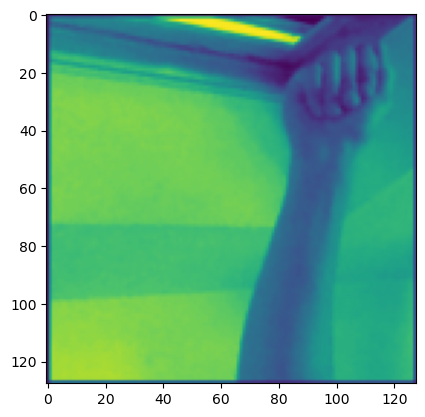

This is  A


In [41]:
n=int(np.random.rand()*10000)

plt.imshow(train_dataset[n][0])
label=train_dataset[n][1]
plt.show()
print('This is ', classes[label])

In [43]:
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.multiclass import OneVsOneClassifier
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [44]:
X=[dataset[n][0] for n in range(len(dataset))]
y=[dataset[n][1] for n in range(len(dataset))]

In [45]:
def plot_decision_boundary(X, y, model, resolution=0.02):
    colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan']
    cmap = ListedColormap(colors[:len(np.unique(y))])
    markers = ('s', 'x', 'o', '^', 'v')      
    
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution), np.arange(y_min, y_max, resolution))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


    for idx, cl in enumerate(np.unique(y)): 
        plt.scatter(X[y==cl, 0], X[y==cl, 1],  color=cmap(idx),edgecolors='k',marker=markers[idx],label=cl)


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
sc=StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

ValueError: Found array with dim 3. StandardScaler expected <= 2.